In [ ]:
#default_exp images

# Image utilities

In [ ]:
#export
from io import BytesIO
from PIL import Image
from s3bz.s3bz import S3
import requests

In [ ]:
#export
def imageFromS3(bucket:str, key:str, **kwargs):
  url=S3.presign(key,bucket=bucket,expiry=10, **kwargs)
  return imageFromUrl(url)
  

In [ ]:
#export
def imageFromUrl(url):
  from io import BytesIO
  image = Image.open(BytesIO(requests.get(url).content))
  return image

In [ ]:
#export
def imageToS3(image:Image, bucket:str, key:str):
  path = '/tmp/tmpImage'
  print(f'saving image to {bucket}/{key}')
  image.save(path,format='png')
  S3.saveFile(key,path,bucket)
  return True

In [ ]:
#export
def resizeImage(url:str,width:int):
  from resizeimage import resizeimage
  img = imageFromUrl(url)
  resizedImg = resizeimage.resize_width(img, 200)
  return resizedImg

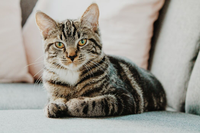

In [ ]:
url = 'https://thethaiger.com/wp-content/uploads/2021/02/cat.jpg'
resizeImage(url, 400)

In [ ]:
#export
def showImgS3(bucket, key):
  from matplotlib.pyplot import imshow
  import time
  imageFound = False
  while imageFound == False:
    if S3.exist( key,bucket=bucket):
      url = S3.presign(key,expiry='10',bucket=bucket)
      img = imageFromUrl(url)
      imshow(img)
      imageFound = True
    else:
      print('conversion failed or didnt happen')
      time.sleep(1)

In [ ]:
key = 'testCat.png'
path = '/tmp/testCat.png'
bucket = 'villa-remove-bg-small-output'
url = 'https://sites.google.com/site/funnycatmeawww/_/rsrc/1422326075261/home/6997052-funny-cat.jpg?height=675&width=1200'

saving image to villa-remove-bg-small-output/testCat.png
False


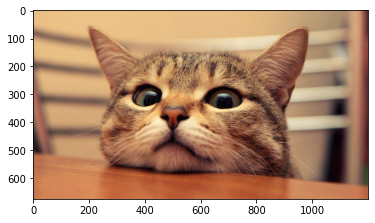

In [ ]:
## full test
img = imageFromUrl(url)
imageToS3(img, bucket, key)
showImgS3(bucket, key)
S3.deleteFile(key,bucket)
print(S3.exist(key,bucket))